In [1]:
import torch
import random

import numpy as np
import matplotlib.pyplot as plt
import pretrained_microscopy_models as pmm

import yoeo.comparisons.pmm_helpers as pmm_h

N CPUS: 110


/home/ronan/miniconda3/envs/dv2/lib/python3.12/site-packages/kornia/feature/lightglue.py:44: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @torch.cuda.amp.custom_fwd(cast_inputs=torch.float32)


In [2]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

In [3]:
device = "cuda"
arch: str = "UnetPlusPlus"
encoder: str = "resnet50"
pretrained_weights: str = "micronet"
sparse: bool = False

In [4]:
model = pmm_h.get_model(n_classes=3, arch=arch, encoder=encoder, pretrained_weights=pretrained_weights)

In [5]:
class_values = {'matrix': [85,85,85],
               'secondary': [170,170,170],
               'tertiary' : [255,255,255],
               }
class_values_original = {'matrix': [0,0,0],
               'secondary': [255,0,0],
               'tertiary' : [0,0,255]}
class_values_plus_unlabelled = {'matrix': [85,85,85],
               'secondary': [170,170,170],
               'tertiary' : [255,255,255],
               'unlabelled': [0, 0, 0]}

values = class_values_plus_unlabelled if sparse else class_values

In [6]:
DATA_PATH = "fig_data/CNN_comparison/ni_superalloy"
train_path = f"{DATA_PATH}/train_sparse_annot" if sparse else f"{DATA_PATH}/train_annot"
train_ds = pmm_h.get_dataset(values, f"{DATA_PATH}/train", train_path, "train")
val_ds = pmm_h.get_dataset(values, f"{DATA_PATH}/val", f"{DATA_PATH}/val_annot", "val")
test_ds = pmm_h.get_dataset(values, f"{DATA_PATH}/test", f"{DATA_PATH}/test_annot", "val")

In [7]:
masked_loss = pmm_h.MaskedDiceBCELoss(weight=0.7)
default_loss = pmm.losses.DiceBCELoss(weight=0.7)

In [ ]:
results_dict, state = pmm_h.iteratively_train_cnn(train_ds, val_ds, default_loss, class_values, 200, 'iter')


Epoch: 0, lr: 0.00100000, time: 0.00 seconds, patience step: 0, best iou: 0.0000
valid: 100%|██████████| 4/4 [00:00<00:00,  4.43it/s, DiceBCELoss - 0.7052]


Training done! Saving final model
[  1/200] (2.711): 0.1870
reloading state

Epoch: 0, lr: 0.00100000, time: 0.00 seconds, patience step: 0, best iou: 0.0000
valid: 100%|██████████| 4/4 [00:00<00:00,  4.45it/s, DiceBCELoss - 0.8098]


Training done! Saving final model
[  2/200] (5.423): 0.0150
reloading state

Epoch: 0, lr: 0.00100000, time: 0.00 seconds, patience step: 0, best iou: 0.0000
valid: 100%|██████████| 4/4 [00:00<00:00,  4.49it/s, DiceBCELoss - 0.7081]


Training done! Saving final model
[  3/200] (8.162): 0.1659
reloading state

Epoch: 0, lr: 0.00100000, time: 0.00 seconds, patience step: 0, best iou: 0.0000
valid:   0%|          | 0/4 [00:00<?, ?it/s]

[0.6900207996368408, 0.6838394105434418, 0.6789554208517075, 0.6841050386428833, 0.6601424962282181, 0.6527075916528702, 0.6608244031667709, 0.6270985752344131, 0.638222947716713, 0.617518961429596, 0.6163273602724075, 0.6165274381637573, 0.6102729439735413, 0.6033939719200134, 0.5934672355651855, 0.5980813503265381, 0.6074884682893753, 0.5908051133155823, 0.607559934258461, 0.5958813428878784, 0.6043358743190765, 0.5915780067443848, 0.5917389988899231, 0.6135482341051102, 0.5918731987476349, 0.5752130746841431, 0.5786766707897186, 0.5827260315418243, 0.581981435418129, 0.5789867043495178, 0.5804590880870819, 0.5762466192245483, 0.58579021692276, 0.5925101786851883, 0.583490714430809, 0.5743401795625687, 0.5720474570989609, 0.5833159685134888, 0.573438748717308, 0.5739648193120956, 0.5688541680574417, 0.5713213086128235, 0.5654066801071167, 0.5698850452899933, 0.5793975591659546, 0.5637676864862442, 0.5701972097158432, 0.5692645907402039, 0.5696260780096054, 0.5720507800579071, 0.56706

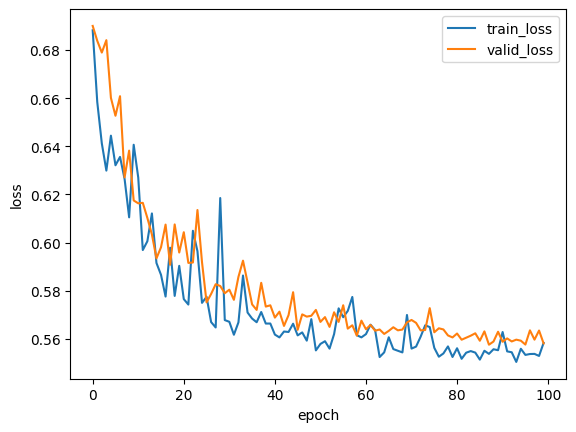

In [20]:
print(state['valid_loss'])

plt.plot(state['train_loss'], label='train_loss')
plt.plot(state['valid_loss'], label='valid_loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

Text(0.5, 0, 'Time (s)')

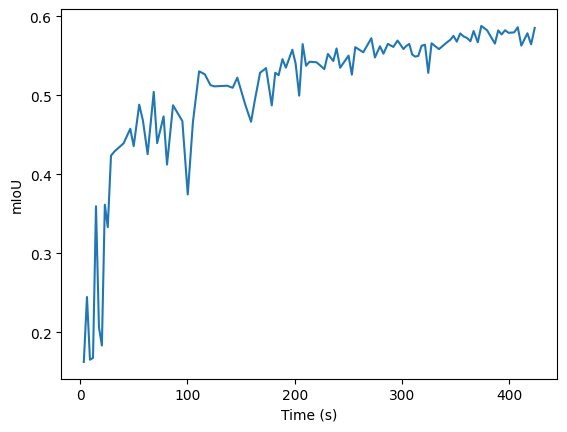

In [21]:
plt.plot([i["tot_time"] for i in results_dict], [i["miou"] for i in results_dict])
plt.ylabel("mIoU")
plt.xlabel("Time (s)")

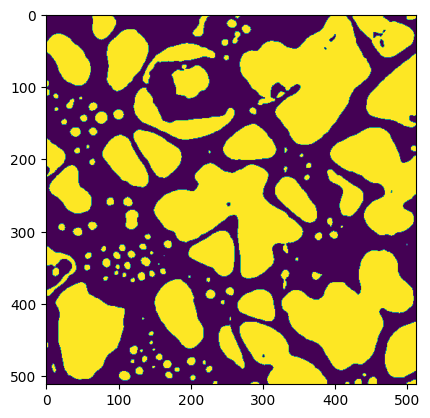

In [19]:
plt.imshow(results_dict[-1]['preds'][6])